# Statystyka w Analizie Danych - Projekt 1 Zadanie 1

+ Autorzy:
    + Łukasz Staniszewski (nr indeksu: 304098)
    + Maksim Makaranka (nr indeksu: 308826)
+ Semestr: 2023Z

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from core import DataLoader

import warnings
warnings.filterwarnings('ignore')

## Załadowanie danych

In [2]:
Poland = DataLoader('../data/poland')
Czech = DataLoader('../data/czech')
Netherlands = DataLoader('../data/netherlands')
Spain = DataLoader('../data/spain')

## Porównanie danych nt. bezrobocia z korekcją sezonowości i bez

W niniejszej analizie porównujemy dane dotyczące bezrobocia z uwzględnieniem korekcji sezonowości oraz bez niej. Celem jest wykrycie ewentualnych wzorców i trendów, które mogą wpływać na fluktuacje na rynku pracy. Analiza danych pomaga lepiej zrozumieć dynamikę bezrobocia oraz dostarcza istotnych informacji na temat zmienności zatrudnienia w różnych okresach czasu. Poniższy wykres prezentuje dane dotyczące poziomu bezrobocia w Polsce na przestrzeni całego okresu raportowania od stycznia 1997 do września 2023 roku.

<Axes: xlabel='Period', ylabel='Unemployment rate [%]'>

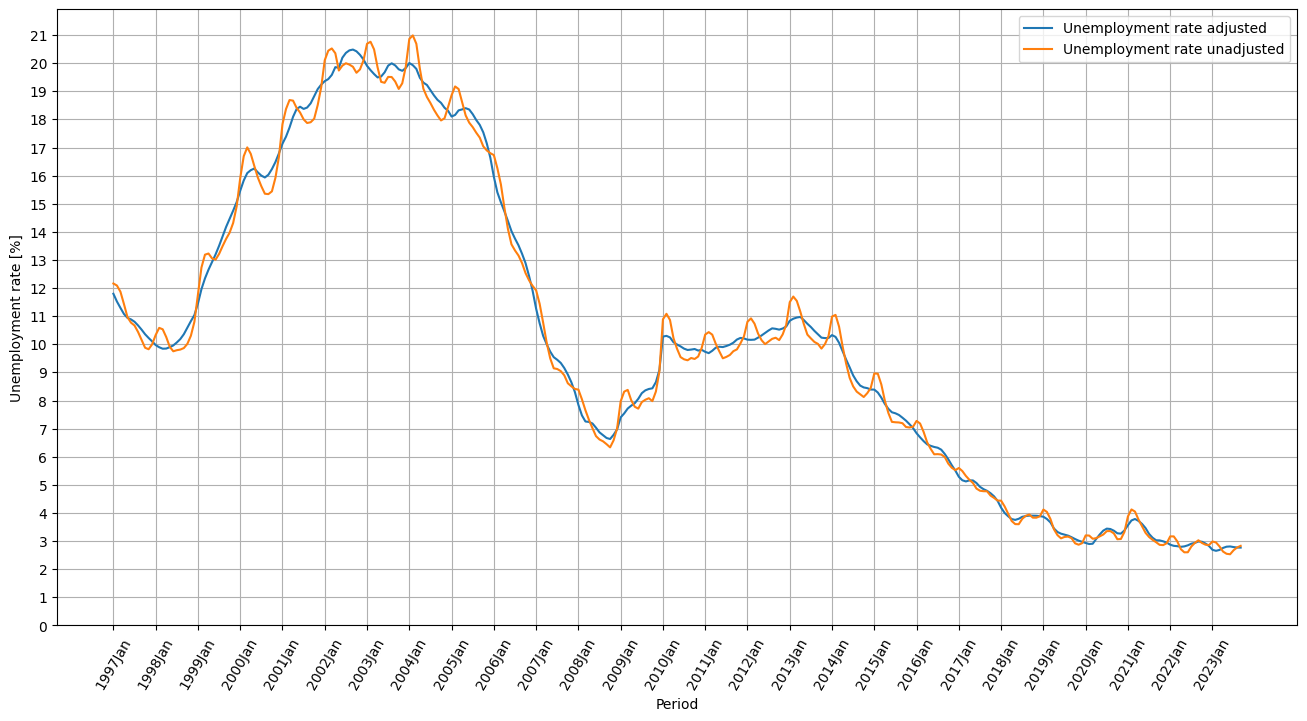

In [3]:
df_adjusted = Poland.unrate_adjusted_df.copy()
df_unadjusted = Poland.unrate_unadjusted_df.copy()
df = pd.DataFrame({
    'Unemployment rate adjusted': df_adjusted['Rate'].tolist(),
    'Unemployment rate unadjusted': df_unadjusted['Rate'].tolist()
    }, index=df_adjusted['Period'])

x_ticks = range(0, df_adjusted['Period'].count(), 12)
y_ticks = range(0, int(max(df_unadjusted['Rate'])) + 2)
df.plot(xticks=x_ticks, yticks=y_ticks, figsize=(16, 8), rot=60, grid=True, ylabel="Unemployment rate [%]")

Analizując wykres można zauważyć, że krzywa bez korekcji przedstawia wyraźne okresowe oscylacje, które wynikają z naturalnych wahań zatrudnienia w różnych miesiącach. Te zmiany mogą być rezultatem sezonowych tendencji, takich jak zwiększenie aktywności gospodarczej w konkretnych sektorach w określonych miesiącach. W celu pełnego zrozumienia istoty tych oscylacji, należy przyjrzeć się pomiesięcznym zmianom bezrobocia na przestrzeni kilku lat.

<Axes: xlabel='Period', ylabel='Unemployment rate [%]'>

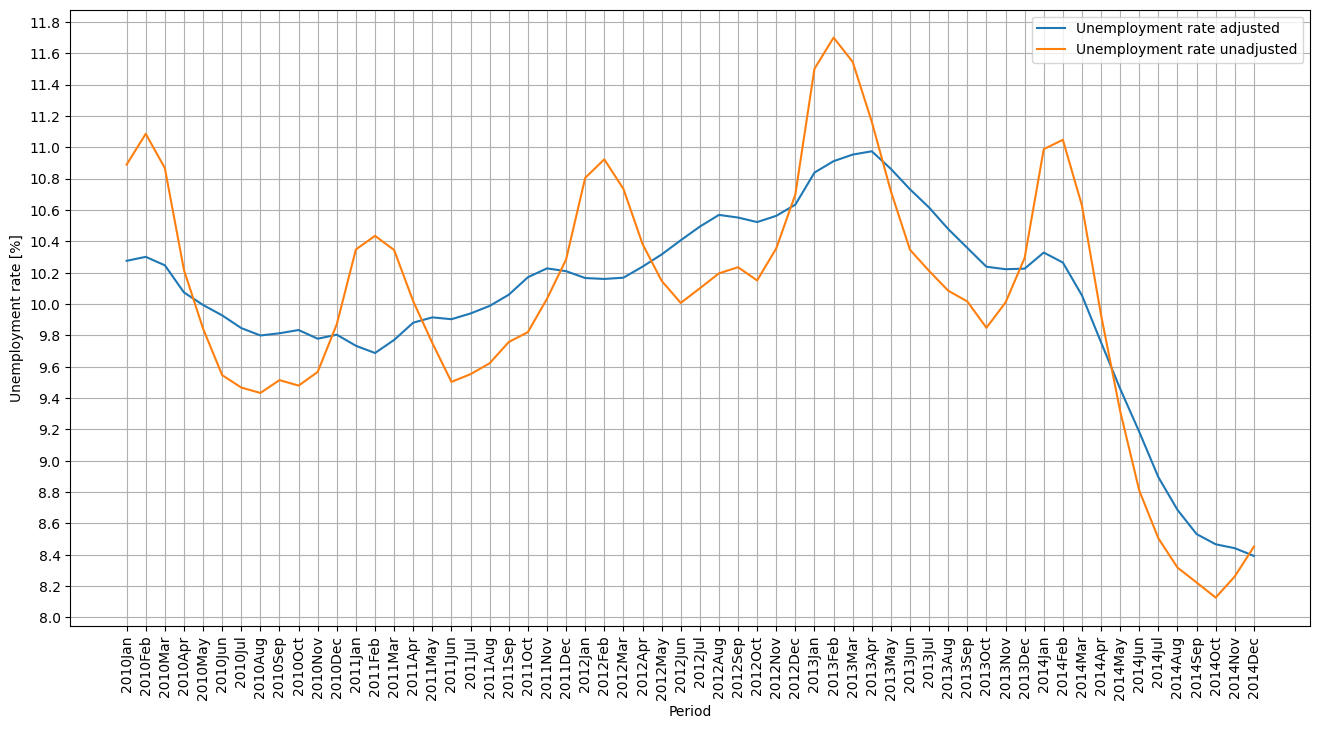

In [4]:
df_adjusted_period = df_adjusted[(df_adjusted['CollectionDate'] > dt.datetime(2010, 1, 1))
                                 & (df_adjusted['CollectionDate'] < dt.datetime(2015, 1, 1))]
df_unadjusted_period = df_unadjusted[(df_unadjusted['CollectionDate'] > dt.datetime(2010, 1, 1))
                                      & (df_unadjusted['CollectionDate'] < dt.datetime(2015, 1, 1))]
df = pd.DataFrame({
    'Unemployment rate adjusted': df_adjusted_period['Rate'].tolist(),
    'Unemployment rate unadjusted': df_unadjusted_period['Rate'].tolist()
    }, index=df_adjusted_period['Period'])

x_ticks = range(0, df_adjusted_period['Period'].count())
y_ticks = np.arange(int(min(df_unadjusted_period['Rate'])), max(df_unadjusted_period['Rate']) + 0.2, 0.2)
df.plot(xticks=x_ticks, yticks=y_ticks, figsize=(16, 8), rot=90, grid=True, ylabel="Unemployment rate [%]")

Analiza wykresu wykazuje wyraźne sezonowe zmiany w poziomie bezrobocia w Polsce. Wzrost bezrobocia od października do lutego sugeruje możliwe związki z sezonowymi pracami, zwłaszcza w sektorze związanym z warunkami atmosferycznymi, np. rolnictwo. Spadek od marca do miesięcy ciepłych może wskazywać na zwiększoną aktywność sezonową, zwłaszcza w branżach turystycznych czy gastronomicznych. Te obserwowane fluktuacje mogą również mieć związek z cyklem zakończenia studiów, kiedy absolwenci wchodzą na rynek pracy.

## Analiza zmian bezrobocia w Polsce w porównaniu do zmian w Czechach, Holandii i Hiszpanii

Wybór konkretnych krajów dla analizy zmian poziomu bezrobocia w Polsce został dokonany ze względu na ich unikalne konteksty gospodarcze. Czechy, podobnie jak Polska, mają historyczne związki z blokiem socjalistycznym, co sugeruje, że oba kraje mogą dzielić się pewnymi wspólnymi wyzwaniami i doświadczeniami gospodarczymi. Holandia, będąca krajem o stabilnej gospodarce w bloku zachodnim, stanowi punkt odniesienia dla analizy porównawczej. Hiszpania, też będąca krajem bloku zachodniego, ale z pewnymi trudnościami gospodarczymi, dostarcza kontrastujący kontekst, co umożliwia lepsze zrozumienie różnic między badanymi krajami.

Używamy danych z korekcją sezonowości, ponieważ uwzględnione w niej czynniki, występujące powszechnie we wszystkich państwach, nie są interesujące z perspektywy porównań między państwami.

<Axes: xlabel='Period', ylabel='Unemployment rate [%]'>

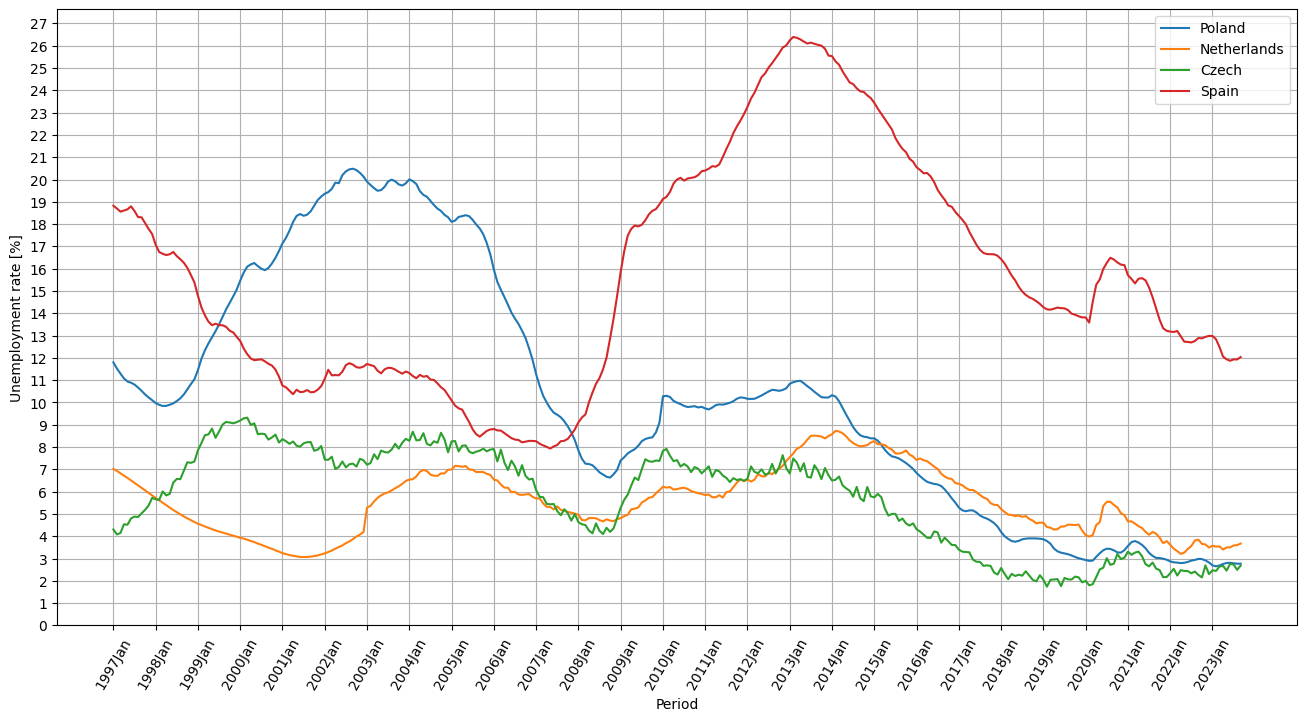

In [5]:
df_unrate_pl = Poland.unrate_adjusted_df.copy()
df_unrate_cz = Czech.unrate_adjusted_df.copy()
df_unrate_nl = Netherlands.unrate_adjusted_df.copy()
df_unrate_es = Spain.unrate_adjusted_df.copy()
df = pd.DataFrame({
    'Poland': df_unrate_pl['Rate'].tolist(),
    'Netherlands': df_unrate_nl['Rate'].tolist(),
    'Czech': df_unrate_cz['Rate'].tolist(),
    'Spain': df_unrate_es['Rate'].tolist()
    }, index=df_adjusted['Period'])

x_ticks = range(0, df_unrate_es['Period'].count(), 12)
y_ticks = range(0, int(max(df_unrate_es['Rate'])) + 2)
df.plot(xticks=x_ticks, yticks=y_ticks, figsize=(16, 8), rot=60, grid=True, ylabel="Unemployment rate [%]")

Analizując krzywe na wykresach zmian w Czechach i Polsce, można zauważyć, że w przeciwieństwie do pozostałych badanych krajów, prezentują one podobny kształt. To sugeruje, że oba kraje doświadczyły zbliżonych procesów gospodarczych. Od końca lat 90 do połowy lat 2000 obie krzywe wykazują recesję związaną z transformacją gospodarki z planowej na rynkową. W tym okresie proces prywatyzacji często doprowadzał do utraty miejsc pracy, co wyraźnie widać na wykresie.

Następnie, w kontekście kryzysu finansowego w latach 2007-2009`[1]`, który wpłynął na wszystkie badane kraje, Polska wydaje się poradziła sobie znacznie lepiej niż z kryzysem transformacyjnym. Wyniki te mogą wskazywać na rosnącą odporność polskiego rynku pracy przed globalnymi wyzwaniami ekonomicznymi.

Analizując kształt krzywej dla Holandii, zauważamy brak kryzysu transformacyjnego, lecz niewielki wzrost bezrobocia związany z ogólną transformacją regionu oraz, teoretycznie, z dołączeniem nowych krajów do UE i otwarciem holenderskiego rynku pracy dla ich obywateli. Analogiczny skok można również dostrzec w przypadku Hiszpanii.

W przypadku Hiszpanii podczas analizy kształtu krzywej zauważalny jest wyraźny spadek na początku okresu raportowania. Teoretycznie mogło to wynikać z pewnego lokalnego kryzysu pod koniec lat 90. Posługując się informacjami w Internecie można dowiedzieć się, że w drugiej połowie lat 90 Hiszpania doświadczyła boomu na rynku nieruchomości, który w końcu przerodził się w kryzys. Bańka spekulacyjna na rynku spowodowała nadmierne zadłużenie i nadmiar mieszkań. W wyniku kryzysu na rynku nieruchomości i bańki spekulacyjnej bezrobocie w Hiszpanii wzrosło, szczególnie w sektorze budowlanym, który był jednym z głównych zatrudniających`[2]`. Niestabilna sytuacja gospodarcza w kolejnych latach również częściowo tłumaczy, dlaczego kryzys finansowy lat 2007-2009, mający negatywny wpływ na wszystkie badane kraje, spowodował najbardziej tragiczny wzrost bezrobocia w przypadku Hiszpanii.

W perspektywie kryzysu związanego z pandemią COVID-19 w latach 2020-2021`[3]`, obserwujemy ponownie wpływ na wszystkie badane kraje. Warto zaznaczyć, że kraje te poradziły sobie z tą sytuacją stosunkowo podobnie, co może świadczyć o ogólnej postaci kryzysu, która wywołała podobne wyzwania dla różnych gospodarek.

Wniosek z analizy zmian poziomu bezrobocia w badanych krajach jest taki, że w różnych okresach czasowych te zmiany są uzależnione od różnorodnych czynników ekonomicznych, społecznych i historycznych. Odkrycie podobnych trendów, takich jak recesja transformacyjna, skok bezrobocia związany z restrukturyzacją regionu, relatywnie jednolita reakcja na kryzys finansowy i kryzys związany z pandemią COVID-19, oraz istotny wpływ kryzysu lokalnego, sugeruje, że dynamika bezrobocia jest silnie związana z charakterystykami gospodarczymi i strukturalnymi każdego kraju, a w nieco mniejszym stopniu również z ogólnymi tendencjami oraz specyficznymi wyzwaniami w regionie i na świecie.

## Analiza różnicy poziomu bezrobocia wśród kobiet i mężczyzn

W niniejszej analizie porównano poziom bezrobocia między kobietami a mężczyznami w Polsce, korzystając z nieskorygowanych sezonowo danych. Celem tej analizy jest zrozumienie różnic we wpływie sezonowości na poziom bezrobocia dla obu płci oraz identyfikacja ogólnych tendencji jego zmian. Poniższy wykres przedstawia miesięczne zmiany w poziomie bezrobocia w okresie lat 2010-2014.

<Axes: xlabel='Period', ylabel='Unemployment rate [%]'>

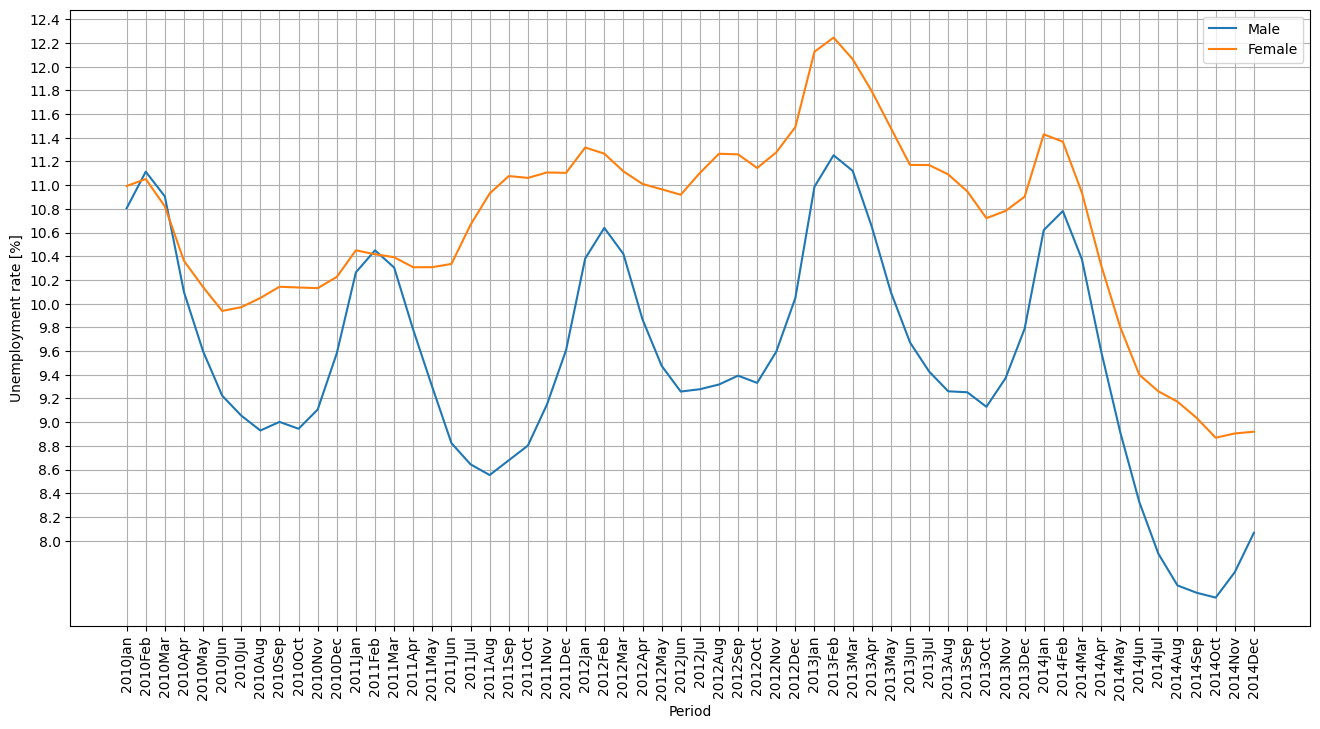

In [6]:
df_male = Poland.unrate_unadjusted_male_df.copy()
df_female = Poland.unrate_unadjusted_female_df.copy()
df_male = df_male[(df_male['CollectionDate'] > dt.datetime(2010, 1, 1))
                  & (df_male['CollectionDate'] < dt.datetime(2015, 1, 1))]
df_female = df_female[(df_female['CollectionDate'] > dt.datetime(2010, 1, 1))
                  & (df_female['CollectionDate'] < dt.datetime(2015, 1, 1))]
df = pd.DataFrame({
    'Male': df_male['Rate'].tolist(),
    'Female': df_female['Rate'].tolist()
    }, index=df_male['Period'])

x_ticks = range(0, df_female['Period'].count())
y_ticks = np.arange(int(min(df_female['Rate'])), max(df_female['Rate']) + 0.2, 0.2)
df.plot(xticks=x_ticks, yticks=y_ticks, figsize=(16, 8), rot=90, grid=True, ylabel="Unemployment rate [%]")


Analizując przedstawiony wykres, zauważamy wyraźny wzrost poziomu bezrobocia między październikiem a lutym, a następnie spadek pomiędzy marcem a miesiącami letnimi dla obu płci, z szczególnie zauważalnymi fluktuacjami wśród mężczyzn. Możliwe jest, że jednym z istotnych czynników wpływających na te sezonowe zmiany jest cykl edukacyjny, ponieważ studenci preferują ograniczać swoją aktywność zawodową podczas semestru. Jednak, wpływ tego czynnika nie jest jednoznacznie określony, ponieważ status studenta nie zawsze jest w pełni traktowany jako bezrobotny, oraz niewiadomo, jak to jest uwzgłędnione w danych. Dane o szkolnictwie wyższym zebrane przez GUS`[4]` wskazują również, że ilość osób studiujących jest podobna dla obu płci, z niewielką przewagą kobiet (58,4%), z czego wynika mały wpływ cyklu edukacyjnego na zmiany różnicy poziomu męskiego a kobiecego bezrobocia. Również analizując dane ze źródła, możemy przypuścić, że niewielkie wzrosty bezrobocia wśród kobiet w miesiącach letnich mogą być związane z tym, że kobiety częściej wybierają studia na kierunkach humanistycznych (licencjat bądź jednolite magisterskie), które zazwyczaj kończą się w czerwcu. Jednocześnie wśród mężczyzn bardziej popularne są kierunki techniczne, zwykle kończące się w lutym (studia inżynierskie).

Jednak znacznie bardziej istotnym czynnikiem wydają się być prace sezonowe. W sektorach takich jak rolnictwo i budownictwo prace sezonowe często wymagają intensywnego fizycznego wysiłku, co sprawia, że są bardziej dostępne dla mężczyzn. Prace w rolnictwie, zwłaszcza związane ze zbiorami czy uprawą, często wymagają siły fizycznej, co może przyczyniać się do większej obecności mężczyzn w tej dziedzinie, podobnie jak w budownictwie. Innym sektorem o znacznej obecności prac sezonowych jest turystyka, gdzie jednak zazwyczaj niema przewagi jednej płci nad drugą wśród zatrudnionych.

Podsumowując można stwierdzić, że prace sezonowe są kluczowym sezonowym czynnikiem wpływającym na różnice bezrobocia między kobietami a mężczyznami, podczas gdy cykl edukacyjny odgrywa mniejszą rolę w tych oscylacjach. Również jest widoczne, że poziom bezrobocia wśród kobiet utrzymuje się średnio trochę wyżej niż wśród mężczyzn, co jest zgodne z normami obserwowanymi w Europie`[5]`.

## Źródła
`[1]` https://en.wikipedia.org/wiki/Great_Recession  
`[2]` https://en.wikipedia.org/wiki/Spanish_property_bubble  
`[3]` https://en.wikipedia.org/wiki/COVID-19_recession  
`[4]` https://stat.gov.pl/files/gfx/portalinformacyjny/pl/defaultaktualnosci/5488/8/8/1/szkolnictwo_wyzsze_w_roku_akademickim_2021-2022_2.pdf  
`[5]` https://ec.europa.eu/eurostat/cache/infographs/womenmen/bloc-2b.html